<a href="https://colab.research.google.com/github/Steffenanderson/Machine-Learning-Exercises/blob/main/Regression_Metrics_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics - Boston Housing 

**Task**

Calculate the mean absolute error (MAE), mean squared error (MSE), and the root mean squared error (RMSE) for the dataset and model.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas.util.testing as tm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
raw_df = pd.read_csv('/content/drive/MyDrive/modifiedBostonHousing.csv')
raw_df.head().T

,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18.00000,0.00000,0.00000,0.00000,0.00000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800
RM,6.57500,6.42100,7.18500,6.99800,7.14700
AGE,65.20000,78.90000,61.10000,45.80000,54.20000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220
RAD,1.00000,2.00000,2.00000,3.00000,3.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000


In [3]:
raw_df.shape

(506, 14)

In [4]:
# getting the columns requested in the task
raw_df = raw_df.loc[:, ['RM',
                    'LSTAT',
                    'PTRATIO',
                    'price']]
raw_df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [5]:
# Remove entire rows from a df if they contain any NaNs in them or 'all'
# this may not be the best stratefy for our dataset
raw_df = raw_df.dropna(how = 'any')
raw_df.shape

(505, 4)

In [6]:
price_filter = raw_df.loc[:, 'price'] < 0
raw_df = raw_df.loc[~price_filter, :]
clean_df = raw_df
clean_df

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2
...,...,...,...,...
501,6.593,9.67,21.0,22.4
502,6.120,9.08,21.0,20.6
503,6.976,5.64,21.0,23.9
504,6.794,6.48,21.0,22.0


# Measuring Model Performance

Unlike classification models where a common metric is accuracy, regression models use other metrics like R^2, the coefficient of determination to quantify your model's performance. The best possible score is 1.0. A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

In [7]:
# feature matrix
X = clean_df.loc[:, ['RM','LSTAT','PTRATIO']].values
# target vector
y = clean_df.loc[:, 'price'].values
# constant biased term
X = sm.add_constant(X)

# Used ML model OLS (ordinary least squared) to see R-Squared 
# >>> not part of assignment just wanted to confirmed 0.78 from 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

# Adj. R-sqaured is close to R-Square == de minimis random features

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     486.4
Date:                Fri, 18 Jun 2021   Prob (F-statistic):          5.05e-133
Time:                        19:13:08   Log-Likelihood:                -1156.2
No. Observations:                 404   AIC:                             2320.
Df Residuals:                     400   BIC:                             2336.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0689      3.639      1.393      0.1

**Mean Absolute Error (MAE):**

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

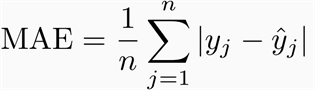


In [8]:
print('MAE:'+str(mean_absolute_error(predictions, y)))

MAE:3.2313558816689745


**Mean Squared Error (MSE):**  

Mean of the squared errors. MSE "punishes" larger errors, which tends to be useful in the real world. Note that for later in the course when we go over how machine learning algorithms work that MSE is continuous and differentiable, making it easier to use than MAE for optimization.

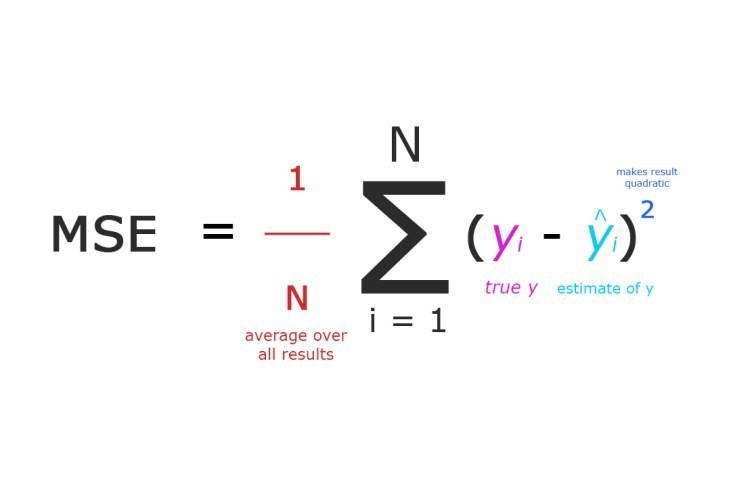

In [9]:
print('MSE:' +str(mean_squared_error(predictions, y)))

MSE:17.915487275260496


**Root Mean Squared Error (RMSE):** 

Square root of the mean of the squared errors. Similar to MSE, but more popular as it is seen as easier to understand than MSE. 

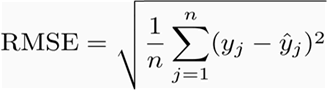

In [10]:
print('RMSE:'+str(np.sqrt(mean_squared_error(predictions, y))))

RMSE:4.232669048633556


**Citations**

https://youtu.be/gofilGC-vMk

https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d

https://medium.com/machine-learning-for-li/a-walk-through-of-cost-functions-4767dff78f7
